In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hull-tactical-market-prediction/train.csv
/kaggle/input/hull-tactical-market-prediction/test.csv
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_inference_server.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/templates.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/base_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/relay.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/kaggle_evaluation.proto
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2_grpc.py
/kaggl

In [67]:
import pandas as pd
train = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/train.csv')
test = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/test.csv')


# train.head(50)
# test.head(50)

In [68]:
# train.head(50)

# train.describe()
# test.describe()
# train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 99 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date_id                               10 non-null     int64  
 1   D1                                    10 non-null     int64  
 2   D2                                    10 non-null     int64  
 3   D3                                    10 non-null     int64  
 4   D4                                    10 non-null     int64  
 5   D5                                    10 non-null     int64  
 6   D6                                    10 non-null     int64  
 7   D7                                    10 non-null     int64  
 8   D8                                    10 non-null     int64  
 9   D9                                    10 non-null     int64  
 10  E1                                    10 non-null     float64
 11  E10                   

In [69]:
col_impute = [
    'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9',
    'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9',
    'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
    'P5', 'P6', 'P7', 'P8', 'P9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4',
    'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
    'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'
]

for col in col_impute:
    train[col].fillna(train[col].median(),inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             8990 non-null   float64
 11  E10                            8990 non-null   float64
 12  E11                            8990 non-null   f

/tmp/ipykernel_36/1498260105.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(),inplace=True)


In [70]:
missing_counts = df[col_impute].isnull().sum()
print((missing_counts))

print(df['V9'].unique().max())

E1     0
E10    0
E11    0
E12    0
E13    0
      ..
V5     0
V6     0
V7     0
V8     0
V9     0
Length: 85, dtype: int64
12.9975359553446


In [71]:
X = df.drop(columns=['market_forward_excess_returns','date_id'], axis=1)
y = df['market_forward_excess_returns']

In [72]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 5)
# Loop over each train/testidation split
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    # Extract train data for this fold
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    # Extract testidation data for this fold
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]


In [ ]:
# baseline model

from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rmse_scores = []

rf = RandomForestRegressor(n_estimators = 200,random_state = 42)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse_scores.append(rmse)
print(f"Fold {fold + 1} RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE : {mae}")

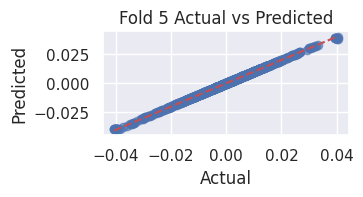

Average RMSE: 0.0001327730388195443
Average MAE: 5.6678502582875275e-05


In [59]:
import numpy as np
import matplotlib.pyplot as plt


plt.subplot(3, 2, fold + 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Fold {fold + 1} Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average MAE: {np.mean(mae)}")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': (100,200,300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False],
    'ccp_alpha': [0.0, 0.01, 0.1]
}


random_search = RandomizedSearchCV(
    rf,
    param_distributions,
    n_iter = 10,
    cv=TimeSeriesSplit(5),
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X, y)
print(random_search.best_params_)